In [1]:
!ls

Analysis_Liquid_Scintillator .ipynb Electrons.txt
Carbon.txt                          ProcessTrack.C
CombinedThree_LS.root               Proton.txt


In [25]:
import uproot
import numpy as np 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys, getopt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sympy import S, symbols, printing
import numericalunits as nu
from scipy import signal
import seaborn as sns
from sklearn.metrics import auc
import pprint as pp
#from detprocess.process import process_data
#from detprocess.io import load_features, load_traces
from glob import glob
import os
import random 
from pprint import pprint as pp
import matplotlib as mpl
from iminuit import Minuit
from iminuit.util import describe, make_func_code
import yaml

import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import numpy as np
import numericalunits as nu
import pandas as pd
import shutil
from sympy import factorrat
from sympy.core.symbol import S
import pickle
import h5py
from tqdm.notebook import tqdm

from obspy.imaging.cm import pqlx

from scipy.interpolate import interp1d

#import pytesdaq.io.hdf5 as h5io

#h5 = h5io.H5Reader()

#from progressbar import ProgressBar
#pbar = ProgressBar()

import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
# set tick width
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2

mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2


from matplotlib import rc, rcParams
#rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')
from matplotlib.gridspec import GridSpec

import matplotlib.colors as mcolors

In [3]:
def interpolate_data(filename):
    # Load the data from the text file
    #filename = "Electrons.txt"  # Replace with the actual file name
    data = np.loadtxt(filename, delimiter=",")

    # Extract Energy and Photon values
    energy = data[:, 0]  # Energy in KeV
    photons = data[:, 1]  # Photon counts
    
    print(energy,photons)
    # Create a linear interpolation function
    intrpld = interp1d(energy, photons, kind="linear", fill_value="extrapolate")
    
    return intrpld,energy, photons


In [106]:
#tree =uproot.open("/Users/pratyushpatel/NEXUS_DD/NEXUS_CDMS/NEXUS_CDMS_analysis/CombinedThree_LS.root")
tree =uproot.open("/Users/pratyushpatel/NEXUS_DD/NEXUS_CDMS/NEXUS_CDMS_analysis/CombinedThree_LS_1cm_dia.root")
#tree =uproot.open("/Volumes/GoogleDrive/My Drive/GraduateWork/HeRALD/raw_geant_outputdir/ProcessedFiles/Run30/24mm/Combined24mm_ForHeSim.root")
#tree =uproot.open("/Volumes/GoogleDrive/My Drive/GraduateWork/HeRALD/raw_geant_outputdir/ProcessedFiles/Run30/27point5mm/Combined27point5mm_ForHeSim.root")

tree3=tree["Event"]
tree3.arrays(tree3.keys())
arr3 = tree3.arrays(tree3.keys())

tree3.keys()

['E_Dep_LS1carbon',
 'E_Dep_LS1electron',
 'E_Dep_LS1gamma',
 'E_Dep_LS1proton',
 'E_Dep_LS1deutrium',
 'E_Dep_LS2carbon',
 'E_Dep_LS2electron',
 'E_Dep_LS2gamma',
 'E_Dep_LS2proton',
 'E_Dep_LS2deutrium',
 'E_Dep_LS3carbon',
 'E_Dep_LS3electron',
 'E_Dep_LS3gamma',
 'E_Dep_LS3proton',
 'E_Dep_LS3deutrium',
 'EventID']

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [108]:
df= pd.DataFrame(({'E_Dep_LS1carbon': np.asarray(tree3['E_Dep_LS1carbon']),\
                       'E_Dep_LS1electron': np.asarray(tree3['E_Dep_LS1electron']),\
                       'E_Dep_LS1gamma': np.asarray(tree3['E_Dep_LS1gamma']),\
                       'E_Dep_LS1proton': np.asarray(tree3['E_Dep_LS1proton']),\
                       'E_Dep_LS1deutrium': np.asarray(tree3['E_Dep_LS1deutrium']),\
                       
                       'E_Dep_LS2carbon': np.asarray(tree3['E_Dep_LS2carbon']),\
                       'E_Dep_LS2electron': np.asarray(tree3['E_Dep_LS2electron']),\
                       'E_Dep_LS2gamma': np.asarray(tree3['E_Dep_LS2gamma']),\
                       'E_Dep_LS2proton': np.asarray(tree3['E_Dep_LS2proton']),\
                       'E_Dep_LS2deutrium': np.asarray(tree3['E_Dep_LS2deutrium']),\
                       
                       'E_Dep_LS3carbon': np.asarray(tree3['E_Dep_LS3carbon']),\
                       'E_Dep_LS3electron': np.asarray(tree3['E_Dep_LS3electron']),\
                       'E_Dep_LS3gamma': np.asarray(tree3['E_Dep_LS3gamma']),\
                       'E_Dep_LS3proton': np.asarray(tree3['E_Dep_LS3proton']),\
                       'E_Dep_LS3deutrium': np.asarray(tree3['E_Dep_LS3deutrium'])}) )
df

,E_Dep_LS1carbon,E_Dep_LS1electron,E_Dep_LS1gamma,E_Dep_LS1proton,E_Dep_LS1deutrium,E_Dep_LS2carbon,E_Dep_LS2electron,E_Dep_LS2gamma,E_Dep_LS2proton,E_Dep_LS2deutrium,E_Dep_LS3carbon,E_Dep_LS3electron,E_Dep_LS3gamma,E_Dep_LS3proton,E_Dep_LS3deutrium
0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,34.253658,0.01495,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,1003.761678,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,46.004230,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,4.700418,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.797648,0.0,0.0,0.0
4130,0.0,0.423438,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4131,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.197597,0.0,0.0,0.0
4132,0.0,0.000000,0.00000,0.000000,0.0,0.0,230.804015,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


[2405.12592176 2004.03551988 1709.60055059 1304.14368952 1006.61824171
  843.69732173  719.74043946  603.25062268  482.36062713  401.91984188
  340.85871521  301.23009387  240.86680629  200.69869565  170.70864448
  129.4579236   100.36558703] [28820.3233142  24085.39451549 20459.48026099 15758.68335386
 12137.94768388 10143.78830478  8616.70073371  7201.05164438
  5730.50757874  4789.03495645  4068.07395651  3570.27365899
  2887.91620781  2413.45665815  2041.77958615  1553.53038533
  1201.48004829]
[  99.92280006  129.26266312  170.44628216  200.38658791  240.13450394
  300.30644806  340.30914226  400.67388888  480.85779236  600.46879333
  719.5754832   842.24486766 1001.91368858 1303.74970623 1704.02113493
 2006.28396386 2397.18294298] [ 11.82035845  14.61327524  18.36328602  21.0950564   24.53157436
  29.11572082  32.50554743  37.03776897  43.247502    51.74949447
  60.17981405  68.29150696  79.0933457   98.18120176 122.37373619
 139.43620481 162.15124347]
[  99.46007314  128.8587597

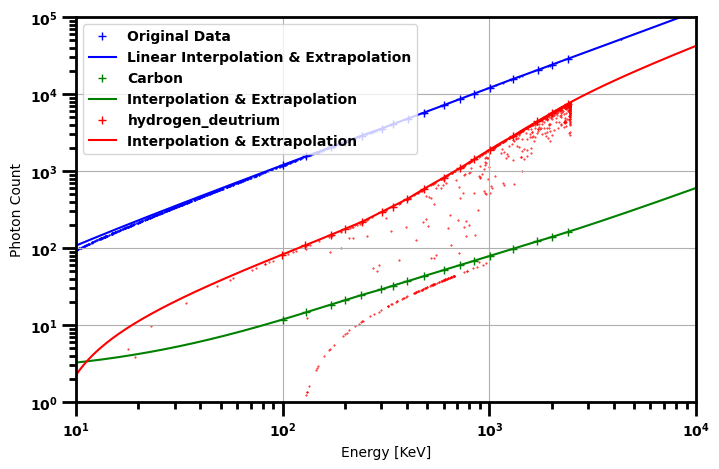

In [100]:

'''
# Load the data from the text file
filename = "Electrons.txt"  # Replace with the actual file name
data = np.loadtxt(filename, delimiter=",")

# Extract Energy and Photon values
energy = data[:, 0]  # Energy in KeV
photons = data[:, 1]  # Photon counts

# Create a linear interpolation function
Electrons = interp1d(energy, photons, kind="linear", fill_value="extrapolate")

'''






# Plot results
plt.figure(figsize=(8, 5))

# Define new energy values for interpolation and extrapolation
new_energy =np.linspace(0.001, 10000, 20000)  # Extend beyond given data

Electrons,energy, photons= interpolate_data("Electrons.txt")
new_photons = Electrons(new_energy)
plt.plot(energy, photons, 'b+', label="Original Data")  # Original points
plt.plot(new_energy, new_photons, 'b-', label="Linear Interpolation & Extrapolation")  # Interpolation


Carbon,energy, photons= interpolate_data("Carbon.txt")
new_photons = Carbon(new_energy)
plt.plot(energy, photons, 'g+', label="Carbon")  # Original points
plt.plot(new_energy, new_photons, 'g-', label="Interpolation & Extrapolation")  # Interpolation


hydrogen_deuterium,energy, photons= interpolate_data("Proton.txt")
new_photons = hydrogen_deuterium(new_energy)
plt.plot(energy, photons, 'r+', label="hydrogen_deutrium")  # Original points
plt.plot(new_energy, new_photons, 'r-', label="Interpolation & Extrapolation")  # Interpolation




plt.scatter( df1[f'LS1_electron_type'],df1[f'LS1_electron_type_light'], color='blue', s =0.2) 


plt.scatter( df1[f'LS1_hadron_type'],df1[f'LS1_hadron_type_light'], color='red', s =0.2) 


plt.xlabel("Energy [KeV]")
plt.ylabel("Photon Count")
plt.legend()
plt.xscale("log")
plt.yscale("log")


plt.xlim(10,1e4)
plt.ylim(1,1e5)
plt.grid()
plt.show()

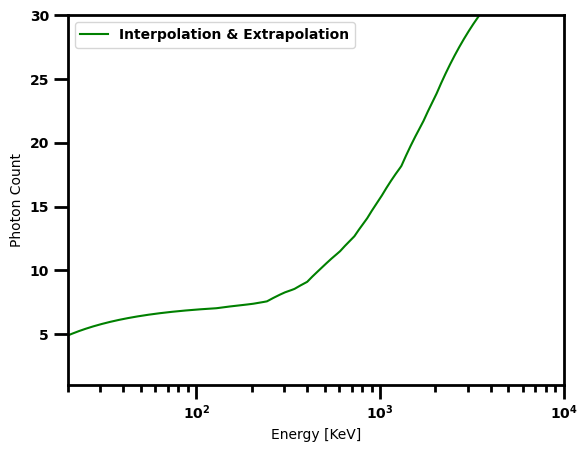

In [101]:
new_photons = Electrons(new_energy)
#plt.plot(energy, photons, 'b+', label="Original Data")  # Original points
#plt.plot(new_energy, new_photons, 'b-', label="Linear Interpolation & Extrapolation")  # Interpolation


new_photons = hydrogen_deuterium(new_energy)
#plt.plot(energy, photons, 'g+', label="Carbon")  # Original points
plt.plot(new_energy, hydrogen_deuterium(new_energy)/Electrons(new_energy)*100 , 'g-', label="Interpolation & Extrapolation")  # Interpolation

plt.xlim(20,1e4)
plt.ylim(1,30)

plt.xlabel("Energy [KeV]")
plt.ylabel("Photon Count")
plt.legend()
plt.xscale("log")




In [102]:
hydrogen_deuterium(2450)/Electrons(2450)*100

26.39410353654577

In [103]:
df1 = pd.DataFrame()
for i in range(1, 4):  # LS1 to LS3
    # Electron-type energy: electron + gamma
    electron_energy = df[f'E_Dep_LS{i}electron']
    gamma_energy = df[f'E_Dep_LS{i}gamma']
    df1[f'LS{i}_electron_type_light'] = Electrons(electron_energy) + Electrons(gamma_energy)
    df1[f'LS{i}_electron_type'] = electron_energy + gamma_energy

    # Hadron-type energy: carbon + proton + deuterium
    carbon_energy = df[f'E_Dep_LS{i}carbon']
    proton_energy = df[f'E_Dep_LS{i}proton']
    deutrium_energy = df[f'E_Dep_LS{i}deutrium']

    df1[f'LS{i}_hadron_type_light'] = (
        Carbon(carbon_energy) +
        hydrogen_deuterium(proton_energy) +
        hydrogen_deuterium(deutrium_energy))
    
    df1[f'LS{i}_hadron_type'] = carbon_energy + proton_energy + deutrium_energy

    
df1['LS1_electron_type'][(df1['LS1_electron_type']>0) & (df1['LS1_hadron_type']>0) ]

692     1275.705357
824     1444.568551
1633    1916.885498
1870    2006.495508
2113    1701.957341
2438     505.728581
3358      52.172996
Name: LS1_electron_type, dtype: float64

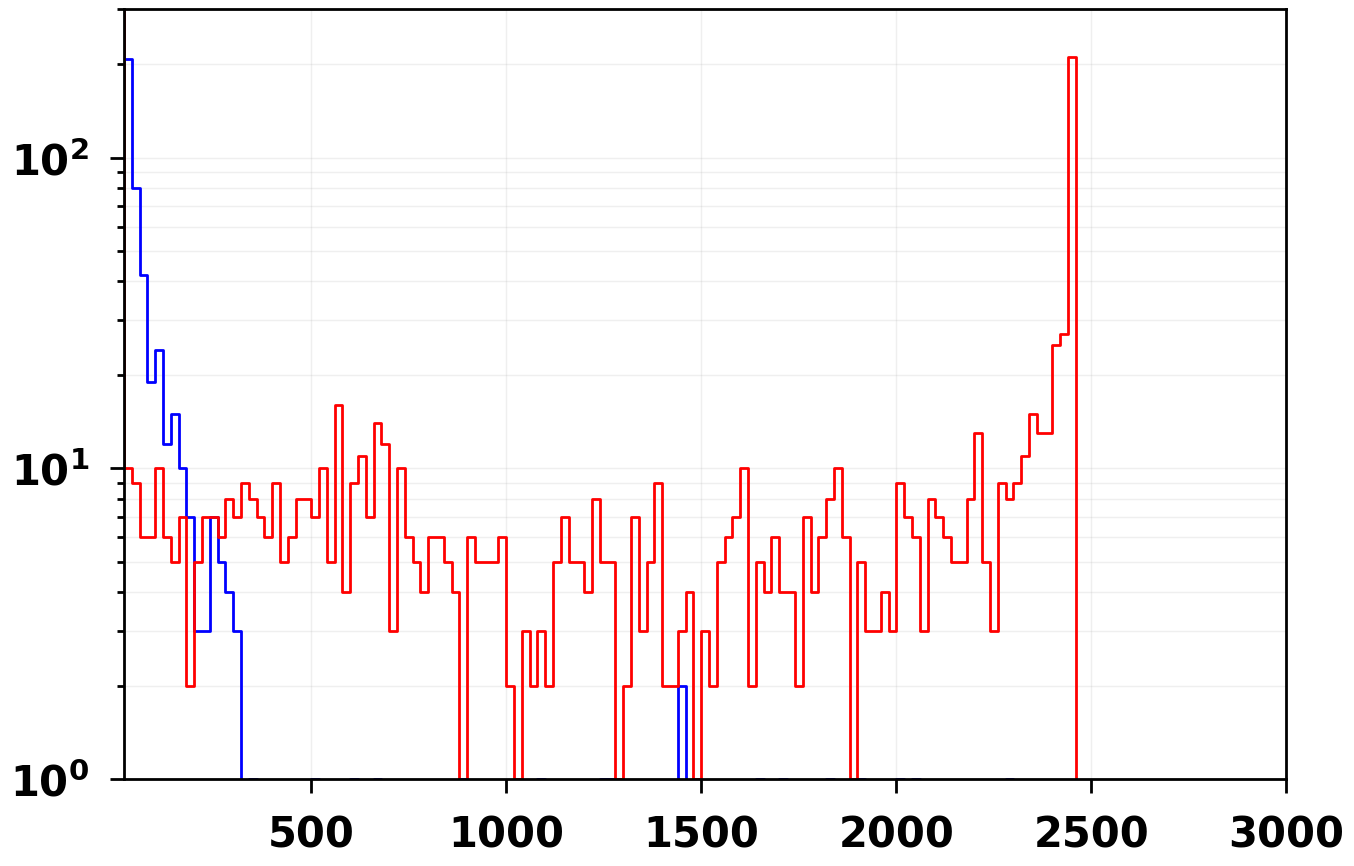

In [104]:
#lets plot the whole data
fig=plt.figure(figsize=(15,10))

#n_CPD,bins=np.histogram(df['E_Dep_LS1gamma'] +  df['E_Dep_LS1electron'] ,\
#                        bins=np.arange(0,5000,20 ), density=False)



n_CPD,bins=np.histogram(df1[f'LS1_electron_type'] ,\
                        bins=np.arange(0,5000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
    
    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df1[f'LS1_hadron_type'] ,\
                        bins=np.arange(0,3000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")

plt.xlim(20,3000)
plt.yscale("log")
plt.ylim(1,300)

df1[f'LS1_hadron_type'][df1[f'LS1_hadron_type']>0].shape[0]\
       /df1[f'LS1_electron_type'][df1[f'LS1_electron_type']>0].shape[0]


plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')


ax=plt.gca()
ax.tick_params(axis='y', pad=15)
ax.tick_params(axis='x', pad=15)


#ax.set_aspect('equal',adjustable= 'box')

#x=np.arange(-100,200,1)
#plt.plot(x, 100-x)

plt.grid(which="both", linewidth=1, alpha =0.2)

Gamma counts:  58
Neutron counts:  668


(array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 [Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$')])

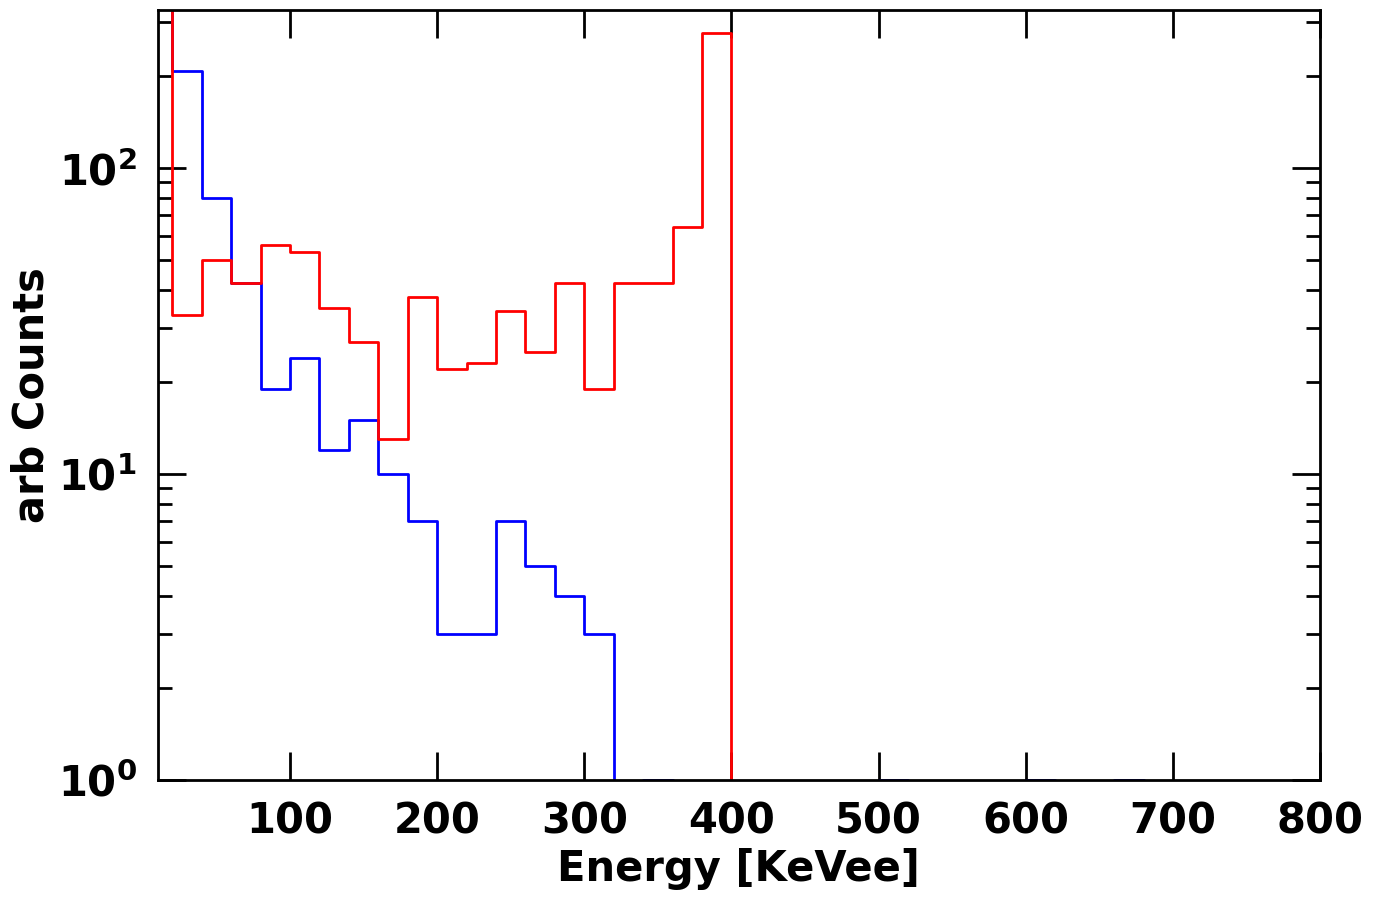

In [109]:
#lets plot the whole data
fig=plt.figure(figsize=(15,10))

#n_CPD,bins=np.histogram(df['E_Dep_LS1gamma'] +  df['E_Dep_LS1electron'] ,\
#                        bins=np.arange(0,5000,20 ), density=False)



n_CPD,bins=np.histogram(df1[f'LS1_electron_type'] ,\
                        bins=np.arange(0,5000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
bin_centers = (bins[:-1] + bins[1:]) / 2
# Create a mask for bins between 190 and 500
mask = (bin_centers >= 142) & (bin_centers <= 500)
# Sum the counts in those bins
counts_in_range = n_CPD[mask].sum()
print("Gamma counts: ",counts_in_range)

    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df1[f'LS1_hadron_type']*0.16 ,\
                        bins=np.arange(0,5000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")


bin_centers = (bins[:-1] + bins[1:]) / 2
# Create a mask for bins between 190 and 500
mask = (bin_centers >= 142) & (bin_centers <= 500)
# Sum the counts in those bins
counts_in_range = n_CPD[mask].sum()
print("Neutron counts: ",counts_in_range)


plt.xlim(10,800)
plt.yscale("log")
plt.ylim(1,330)


plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')


ax=plt.gca()
ax.tick_params(axis='y', pad=15)
ax.tick_params(axis='x', pad=15)


#ax.set_aspect('equal',adjustable= 'box')

#x=np.arange(-100,200,1)
#plt.plot(x, 100-x)

#plt.grid(which="both", alpha =0.2)


plt.ylabel(r'arb Counts',fontsize=30,fontweight='bold')
plt.xlabel(r'Energy [KeVee]',fontsize=30,fontweight='bold')

plt.tick_params(direction='in',which='minor',length=10,bottom=True, top =True, left=True, right=True, \
               grid_linewidth=40 ,color='black')
plt.tick_params(direction='in',which='major',length=20,bottom=True, top =True, left=True, right=True, \
               grid_linewidth=40 ,color='black')

plt.xticks(fontsize=30,fontweight='bold')
plt.yticks(fontsize=30,fontweight='bold')


In [83]:
772/94

8.212765957446809

In [96]:
673/35

19.228571428571428

0.08558139534883721

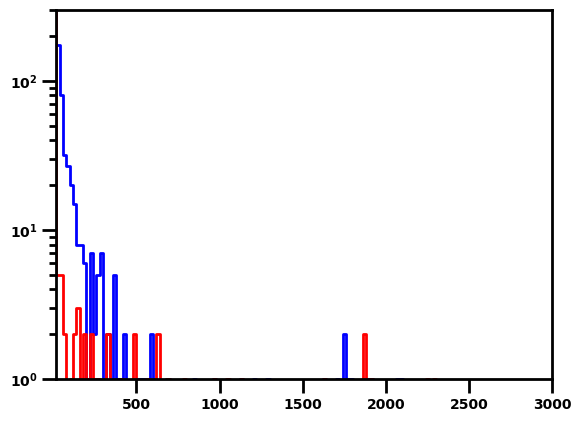

In [64]:

#n_CPD,bins=np.histogram(df['E_Dep_LS1gamma'] +  df['E_Dep_LS1electron'] ,\
#                        bins=np.arange(0,5000,20 ), density=False)



n_CPD,bins=np.histogram(df[f'LS2_electron_type'] ,\
                        bins=np.arange(0,5000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
    
    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df[f'LS2_hadron_type'] ,\
                        bins=np.arange(0,3000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")

plt.xlim(20,3000)
plt.yscale("log")
plt.ylim(1,300)

df[f'LS2_hadron_type'][df[f'LS2_hadron_type']>0].shape[0]\
       /df[f'LS2_electron_type'][df[f'LS2_electron_type']>0].shape[0]

0.09692898272552783

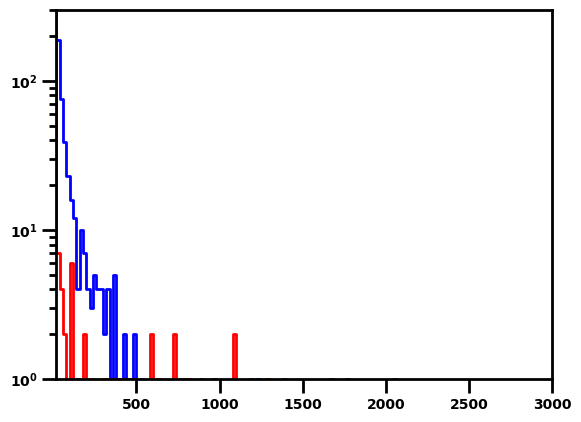

In [66]:

#n_CPD,bins=np.histogram(df['E_Dep_LS1gamma'] +  df['E_Dep_LS1electron'] ,\
#                        bins=np.arange(0,5000,20 ), density=False)



n_CPD,bins=np.histogram(df[f'LS3_electron_type'] ,\
                        bins=np.arange(0,5000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
    
    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df[f'LS3_hadron_type'] ,\
                        bins=np.arange(0,3000,20 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")

plt.xlim(20,3000)
plt.yscale("log")
plt.ylim(1,300)

df[f'LS3_hadron_type'][df[f'LS3_hadron_type']>0].shape[0]\
       /df[f'LS3_electron_type'][df[f'LS3_electron_type']>0].shape[0]

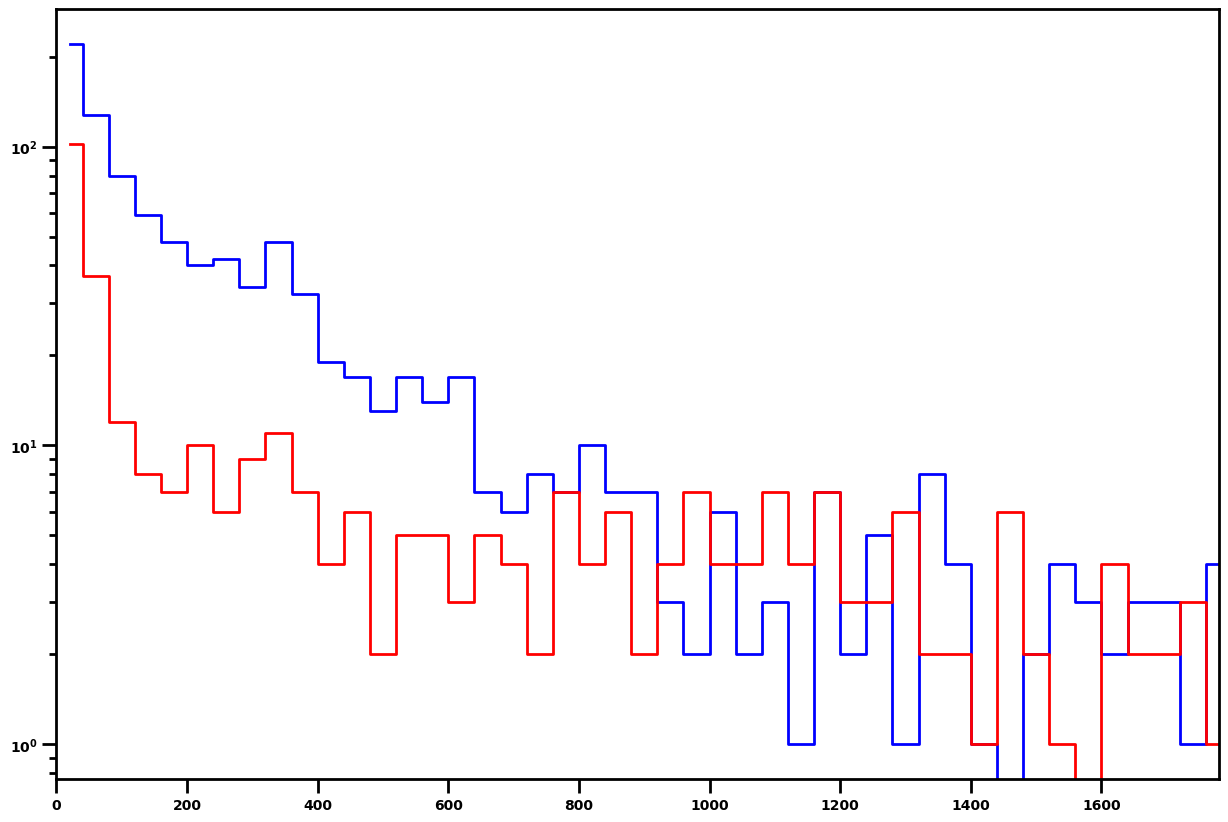

In [35]:
#lets plot the whole data
fig=plt.figure(figsize=(15,10))

#n_CPD,bins=np.histogram(df['E_Dep_LS1gamma'] +  df['E_Dep_LS1electron'] ,\
#                        bins=np.arange(0,5000,20 ), density=False)



n_CPD,bins=np.histogram(df1[f'LS1_electron_type_light'] ,\
                        bins=np.arange(0,5000,40), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
    
    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df1[f'LS1_hadron_type_light'] ,\
                        bins=np.arange(0,5000,40), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")

plt.xlim(0,1780)
plt.yscale("log")

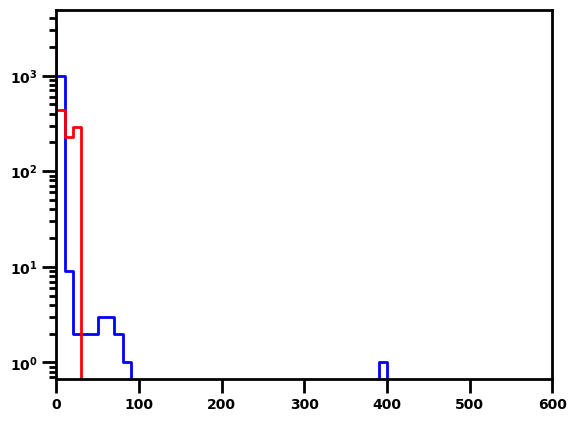

In [58]:

n_CPD,bins=np.histogram(df1[f'LS1_electron_type_light']*3*1e-3 ,\
                        bins=np.arange(-10,600,10 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='blue',linestyle='-',linewidth=2,\
            label= "left ")
    
    
    
#n_CPD,bins=np.histogram(df['E_Dep_LS1proton'] +  df['E_Dep_LS1deutrium']  +  df['E_Dep_LS1carbon'] ,\
#                        bins=np.arange(0,3000,20 ), density=False)


n_CPD,bins=np.histogram(df1[f'LS1_hadron_type_light']*3*1e-3 ,\
                        bins=np.arange(-10,600,10 ), density=False)

#n_CPD,bins=np.histogram(np.asarray(data))
plt.step(0.5*(bins[1:] + bins[:-1]), n_CPD,where='mid',color='red',linestyle='-',linewidth=2,\
            label= "left ")

plt.xlim(0,600)
plt.yscale("log")

In [85]:
!pwd

/Users/pratyushpatel/NEXUS_DD/NEXUS_CDMS/NEXUS_CDMS_analysis
